# Digital Epidemiology Assignment 1 (Facebook) 
### Buratti Benedetto Jacopo - 1494355


In the following homework:

* **I USED 70 LINES (removing comments, imports and prints/plots):** 
    * Section 1 
        * 3 lines
        * 1 line
    * Section 2
        * 1 line
        * 6 lines
        * 5 lines
    * Section 3
        * 9 lines
        * 0 lines
    * Epidemy Class
        * 46 lines
* **I PROCESSED 1M NODES** (youtube notebook)

## INTRO 
In this notebook we are going to use a real social netwrok in order to simulate and analyze a SIR epidemy. 

We are going to use Youtube's community graph. I decided to use this dataset because its connections are intrests-based, given me the possibiliy to simulate an empidemy on a network based on a real-social interactions.

Those are some statistics about Youtube's community graph:

* Nodes 4039	
* Edges	88234 (undirected)
* Connected components 1
* Average clustering coefficient	0.6055
* Number of triangles	1612010
* Fraction of closed triangles	0.2647
* Diameter (longest shortest path)	8


## Part 1 
 
I decided to implement an extended version of the **graph** class of the igraph package; this class is called Epidemy. Epidemy class is freely aviable for download from the following link: https://github.com/aalto1/pandemia

However to make things easier correction-wise, I included my class at the bottom of this notebook.

Essentially the epidemy class implements the following functionalities:

* Create Epidemy Object given a Network and an Epidemic Model
* Simulate on the given network the given Epidemic Model
* Get Network metrics
    * Degree Score
    * Closeness Score
    * Betwenness Score
    * Pagerank Score


In this way we can logically separate our epidemiological analysis from its actual implementation. If the revisor is intrested is intrested in my technical solution the code is widely commented and explained.


### 1.1 Compute and Plot a Social Network Degree [X]


In this section we are required to load in memory the selected graph, Youtube's community graph in our case, and plot its degree distribution.

In [202]:
dataset = "facebook.txt"
a = Epidemy(dataset)
x,y = np.unique(a.graph.degree(), return_counts=True) #3

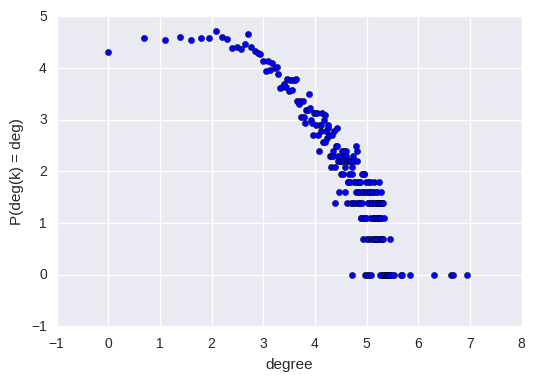

(<matplotlib.collections.PathCollection at 0x7f3acece2f50>,
 None)

In [203]:
plt.scatter(np.log(x), np.log(y)), plt.xlabel("degree"), plt.ylabel("P(deg(k) = deg)"), plt.show()

As we can see from the plot, Youtube's community graph degree distribution has the typical power law of social networks.

### 1.2 SIR Epidemic Model Simulation [X]

We are now required to perform a single plain simulatation of a SIR epidemy and show its epidemic curve:

In [218]:
epidemic_curve = a.SIR(beta = 0.9, mu = 0.1, patient_zero=a.graph.vs.indices[-10:]) #1


('Sentinel', set([2752, 3672, 115, 2510, 1161]), 'P0', set([4032, 4033, 4034, 4035, 4036, 4037, 4038, 4029, 4030, 4031]), 'IN')


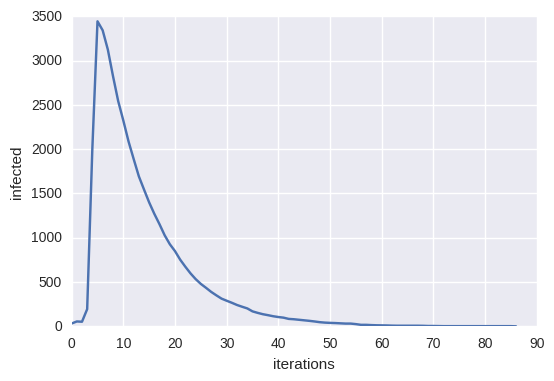

([<matplotlib.lines.Line2D at 0x7f3ad50b38d0>],
 None)

In [219]:
plt.plot(epidemic_curve), plt.xlabel("iterations"), plt.ylabel("infected"), plt.show()

## Part 2

In this section we are going show how to monitor an epidemic outbreak and how the different epidemilogical parameters influence its dynamics. More specifically we are going to use epdiemy sentinels, which are a random set o N nodes of the graph which will record the epidemy arrival time at their position.

### 2.1 SIR Simulation with Static Sentinels [ ] 

In this subsection we are required to monitor an epidemic outbreak. To do this we can exploit the sentinel built in functionality provided by the class **Epidemy**. Indeed, since in the previous section we did not specified any sentinel, the class already choosed at random some of them. However we are intrested in running multiple simulation of the same epidemy, so we are going to use the **N_SIR**, which runs **N** simulations of a given epidemic profile. 

Once the simulation is done, the code plots a boxplot representing the time arrival distribution of the selected sentinels for each of the simulations

In [181]:
df21 = pd.DataFrame(a.N_SIR(num_simulation=100, beta = 0.4, mu = 0.8), columns = ["beta_0.9_mu_0.1"]) #1


('Sentinel', set([1, 898, 4, 777, 891, 13, 142, 15, 915, 23, 26, 27, 924, 671, 35, 165, 936, 47, 965, 696, 954, 479, 956, 829, 1086, 837, 967, 852, 1112, 858, 1119, 830, 1124, 999, 875, 876, 680, 1043, 885, 1019]), 'P0', set([3, 5, 9, 22, 24, 794, 1071, 668, 31, 32, 38, 809, 683, 685, 46, 559, 50, 54, 722, 192, 193, 1090, 579, 1095, 584, 585, 591, 593, 156, 690, 727, 220, 737, 742, 104, 364, 594, 374, 759, 506]), 'IN')
('Sentinel', set([1, 898, 4, 777, 891, 13, 142, 15, 915, 23, 26, 27, 924, 671, 35, 165, 936, 47, 965, 696, 954, 479, 956, 829, 1086, 837, 967, 852, 1112, 858, 1119, 830, 1124, 999, 875, 876, 680, 1043, 885, 1019]), 'P0', set([3, 5, 9, 22, 24, 794, 559, 668, 31, 32, 809, 38, 156, 683, 685, 46, 1071, 50, 54, 192, 193, 1090, 579, 1095, 584, 585, 759, 591, 593, 594, 727, 220, 737, 742, 104, 364, 722, 374, 690, 506]), 'OUT', 0)
('Sentinel', set([1, 898, 4, 777, 891, 13, 142, 15, 915, 23, 26, 27, 924, 671, 35, 165, 936, 47, 965, 696, 954, 479, 956, 829, 1086, 837, 967, 852, 11

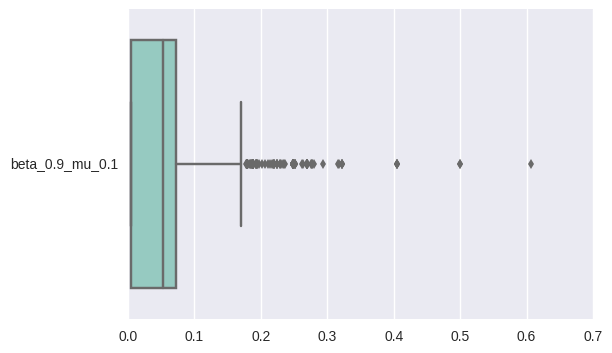

(<matplotlib.axes._subplots.AxesSubplot at 0x7f3ad52cd390>, None)

In [183]:
sb.boxplot(df21, orient="h", palette="Set3"), plt.show()

### 2.2 SIR Simulation with Dynamic Random Sentinels, Seeds and Parameters [ ]

We are now going to try different parameter and input combination, in order to get a better understanding on how the different factor effect the epidemic curve.

* SIR parameters ($\mu$, $\beta$)
* Different sentinels at each loop
* Different number of sentinels
* No overlap between seed and sentinels
* Different seed at each loop
* Multiple Seeds

We can obtain those combination just thanks the built-in functionalities of the epidemy class. Infact the following function will generate at each loop random:

* gamma
* beta
* number of patient zero
* number of sentinels

In this way we are easily able to see how parameters influence epidemic outbreak dynamic.

In [182]:
df22 = pd.DataFrame([])
for i in range(10):
    rnd_beta, rnd_mu = np.random.random(),np.random.random()
    rnd_pat, rnd_sen = np.random.randint(1,a.graph.vcount()),np.random.randint(1,a.graph.vcount())
    simulation_name = "_".join(map(lambda x: str(x),[rnd_beta,rnd_mu,rnd_pat,rnd_sen]))                                                                       
    df22[simulation_name] = a.N_SIR(num_simulation=100, beta = rnd_beta, mu = rnd_mu,
                                  patient_zero= None, num_pat = rnd_pat,
                                  sentinels = None, num_sen = rnd_sen) 


('Sentinel', set([1, 898, 4, 777, 891, 13, 142, 15, 915, 23, 26, 27, 924, 671, 35, 165, 936, 47, 965, 696, 954, 479, 956, 829, 1086, 837, 967, 852, 1112, 858, 1119, 830, 1124, 999, 875, 876, 680, 1043, 885, 1019]), 'P0', set([3, 5, 9, 22, 24, 794, 1071, 668, 31, 32, 38, 809, 683, 685, 46, 559, 50, 54, 722, 192, 193, 1090, 579, 1095, 584, 585, 591, 593, 156, 690, 727, 220, 737, 742, 104, 364, 594, 374, 759, 506]), 'IN')
('Sentinel', set([1, 898, 4, 777, 891, 13, 142, 15, 915, 23, 26, 27, 924, 671, 35, 165, 936, 47, 965, 696, 954, 479, 956, 829, 1086, 837, 967, 852, 1112, 858, 1119, 830, 1124, 999, 875, 876, 680, 1043, 885, 1019]), 'P0', set([3, 5, 9, 22, 24, 794, 559, 668, 31, 32, 809, 38, 156, 683, 685, 46, 1071, 50, 54, 192, 193, 1090, 579, 1095, 584, 585, 759, 591, 593, 594, 727, 220, 737, 742, 104, 364, 722, 374, 690, 506]), 'OUT', 0)
('Sentinel', set([1, 898, 4, 777, 891, 13, 142, 15, 915, 23, 26, 27, 924, 671, 35, 165, 936, 47, 965, 696, 954, 479, 956, 829, 1086, 837, 967, 852, 11

In the following bloxblot we the labels have the following format:

* beta
* mu
* number of patient zero
* number of sentinels

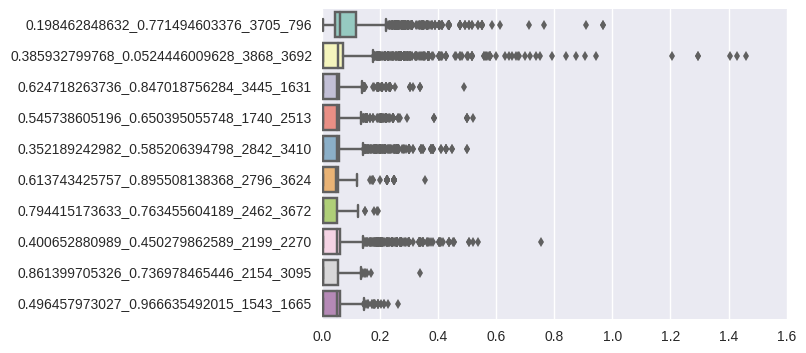

       0.198462848632_0.771494603376_3705_796  \
count                             3663.000000   
mean                                 0.090940   
std                                  0.091769   
min                                  0.004075   
25%                                  0.045426   
50%                                  0.063961   
75%                                  0.116494   
max                                  0.966954   

       0.385932799768_0.0524446009628_3868_3692  \
count                               3996.000000   
mean                                   0.072482   
std                                    0.101490   
min                                    0.004122   
25%                                    0.005687   
50%                                    0.056755   
75%                                    0.074884   
max                                    1.460107   

       0.624718263736_0.847018756284_3445_1631  \
count                              3934.000000  

In [184]:
sb.boxplot(df22, orient="h", palette="Set3"), plt.show()
print df22.describe()

### 2.3 SIR Simulation with Static Top-Ranked Sentinels 

Now we want to investigate if choosing sentinels with high/low centrality measures are able to detect epidemic outbreaks more/less quickly.

We have precomputed the top-1000 and worst-1000 nodes for the following mesures:

* Degree Distribution
* Betweenness Centrality O(VE)
* Closeness Centrality O(V(V+E))
* Eigenvector Centrality O(N×−logϵ/(log|λ1/λ2|))
* PageRank O(V+E)

using the ** graph-tool library which is considerably faster than igraph**. (the code is commented due the conflicts between igraph and graph-tool)



In [ ]:
"""
from graph_tool.all import *
import numpy as np
rankByScore(graph_tool.centrality.pagerank(g), r1 + "pagerank.dump", r2 + "pagerank.dump")
rankByScore(graph_tool.centrality.eigenvector(g)[1], r1 + "eigenvector.dump", r2 + "eigenvector.dump")
rankByScore(g.degree_property_map("total"), r1 + "degree.dump", r2 + "degree.dump")
rankByScore(graph_tool.centrality.closeness(g), r1 + "closeness.dump", r2 + "closeness.dump")
betwenness_socore = rankByScore(graph_tool.centrality.betweenness(g)[0], r1 + "betweenness.dump", r2 + "betweenness.dump")
"""

In [106]:
def getRankings(d, size):
    return [[(f[:-size]+"_worst", np.load(d+f)[:size]), (f[:-size]+"_best", np.load(d+f)[-size:])]
            for f in os.listdir(d)] #2
     

The none parameter forces at each iteration to choose a new patient zero, in this way we are able to test each centrality measure effectivness for 100-times each.

In [108]:
df23 = pd.DataFrame([])
for r in sum(getRankings("rankings/facebook/",5),[]):
    #p0 = np.random.choice(a.graph.vs.indices, size = 10, replace = False).tolist()
    print r
    df23[r[0]] = a.N_SIR(num_simulation = 100, patient_zero = None, sentinels = r[1].tolist()) #3

('betweenness_worst', array([2019, 3269, 3272, 3274, 3313]))
('No patient zero detected. Random selection: ', set([800, 3225, 1339, 3723, 3637]))
('Sentinel', set([3272, 3313, 3274, 2019, 3269]), 'P0', set([800, 3225, 1339, 3723, 3637]), 'IN')
('Sentinel', set([3272, 3313, 3274, 2019, 3269]), 'P0', None, 'OUT', 0)
('No patient zero detected. Random selection: ', set([1153, 569, 2013, 2462, 3071]))
('Sentinel', set([3272, 3313, 3274, 2019, 3269]), 'P0', set([1153, 569, 2013, 2462, 3071]), 'IN')
('Sentinel', set([3272, 3313, 3274, 2019, 3269]), 'P0', None, 'OUT', 1)
('No patient zero detected. Random selection: ', set([1617, 717, 2615, 3429, 1863]))
('Sentinel', set([3272, 3313, 3274, 2019, 3269]), 'P0', set([1617, 717, 2615, 3429, 1863]), 'IN')
('Sentinel', set([3272, 3313, 3274, 2019, 3269]), 'P0', None, 'OUT', 2)
('No patient zero detected. Random selection: ', set([2824, 2136, 2103, 3949, 2967]))
('Sentinel', set([3272, 3313, 3274, 2019, 3269]), 'P0', set([2824, 2136, 2103, 3949, 296

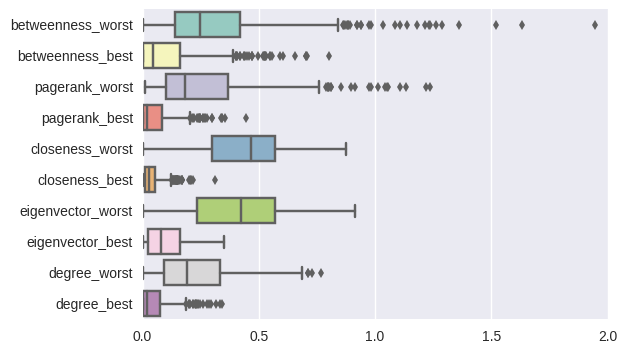

       betweenness_worst  betweenness_best  pagerank_worst  pagerank_best  \
count         498.000000        500.000000      443.000000     500.000000   
mean            0.312294          0.107178        0.263185       0.051905   
std             0.270251          0.145960        0.230987       0.071324   
min             0.000724          0.000215        0.010048       0.000316   
25%             0.137570          0.002964        0.099888       0.000949   
50%             0.246549          0.043975        0.183834       0.020494   
75%             0.420608          0.160150        0.367215       0.082130   
max             1.946665          0.800768        1.235961       0.445715   

       closeness_worst  closeness_best  eigenvector_worst  eigenvector_best  \
count       485.000000      500.000000         478.000000        500.000000   
mean          0.422892        0.042148           0.407466          0.093459   
std           0.201348        0.047845           0.215299          0.

In [110]:
sb.boxplot(df23, orient="h", palette="Set3"), plt.show()
print df23.describe()

## Part 3 

In this final section we are going to investigate how to perform epidemy detection when we have no global information about the global graph topology.

### 3.1 Friend Paradox and Local Centrality Measures [ ]

In this subsection we are intrested in minimizing the **detection time** of our epidemy by the sentinels. We suppose that we do not have any information about the global topology of the graph, but only the informations about the neighbours of our seed nodes.

In order to achive this result we are going to exploit the so called **friend paradox**, which we are going to discuss in section 3.2


In [196]:
df3= pd.DataFrame([])
rnd_sen = np.random.choice(a.graph.vs.indices, size = 40, replace = False).tolist()
neighbors = np.unique(list(chain.from_iterable([a.graph.neighbors(v) for v in rnd_sen]))).tolist()
subGraph = a.graph.induced_subgraph(neighbors + rnd_sen)

topSubGraph = np.transpose(sorted(np.column_stack((subGraph.vs.indices, subGraph.degree())),
                               key=lambda x: x[1]))[0][:40].astype(int)

print(len(rnd_sen), len(topSubGraph))

sn = 5
df3["f_random"]  = a.N_SIR(num_simulation = sn, beta = 0.3, mu = 0.1, 
                                 sentinels = rnd_sen, friend_paradox = False)
df3["f_paradox"] = a.N_SIR(num_simulation = sn, beta = 0.3, mu = 0.1,
                                 sentinels = rnd_sen, friend_paradox = True)
df3["f_topSub"] = a.N_SIR(num_simulation = sn, beta = 0.3, mu = 0.1,
                                 sentinels = topSubGraph, friend_paradox = False) #9


(40, 40)
No_paradox
('Sentinel', set([149, 645, 143, 3989, 2841, 2330, 2204, 2597, 2857, 1070, 2610, 2235, 1590, 4023, 2106, 699, 3389, 63, 3650, 579, 3012, 4037, 845, 1230, 3411, 2516, 599, 1338, 993, 1467, 3433, 364, 1647, 3312, 1910, 3959, 2041, 1917, 3838, 1941]), 'P0', set([0, 352, 107, 1821, 351]), 'IN')
('Sentinel', set([149, 645, 143, 3989, 2841, 2330, 2204, 2597, 2857, 1070, 2610, 2235, 1590, 4023, 2106, 699, 3389, 63, 3650, 579, 3012, 4037, 845, 1230, 3411, 2516, 599, 1338, 993, 1467, 3433, 364, 1647, 3312, 1910, 3959, 2041, 1917, 3838, 1941]), 'P0', set([0, 352, 107, 1821, 351]), 'OUT', 0)
No_paradox
('Sentinel', set([149, 645, 143, 3989, 2841, 2330, 2204, 2597, 2857, 1070, 2610, 2235, 1590, 4023, 2106, 699, 3389, 63, 3650, 579, 3012, 4037, 845, 1230, 3411, 2516, 599, 1338, 993, 1467, 3433, 364, 1647, 3312, 1910, 3959, 2041, 1917, 3838, 1941]), 'P0', set([0, 352, 107, 1821, 351]), 'IN')
('Sentinel', set([149, 645, 143, 3989, 2841, 2330, 2204, 2597, 2857, 1070, 2610, 2235, 15

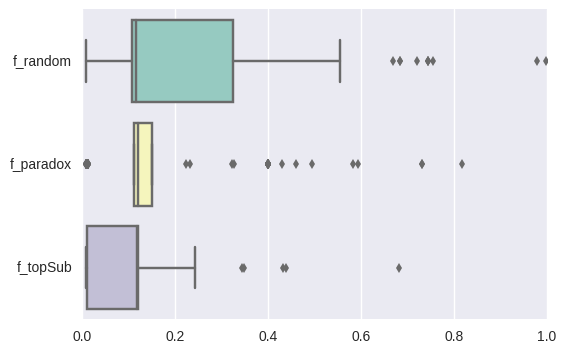

         f_random   f_paradox    f_topSub
count  200.000000  200.000000  199.000000
mean     0.197444    0.158306    0.096636
std      0.193727    0.149370    0.087557
min      0.009932    0.009907    0.009210
25%      0.108595    0.111843    0.010109
50%      0.116249    0.120398    0.118597
75%      0.325427    0.149871    0.119957
max      0.997989    0.817803    0.682475


In [197]:
sb.boxplot(df3, orient="h", palette="Set3"), plt.show()
print df3.describe()

### 3.2 Why the Friendship Paradox Works*? (and also betweenness centrality*) [ ]

**FRIEND PARADOX:**  The Friendship Paradox states that on average given a node in a graph (that we can imagine as a real person) its negihbours (that we can think as its friend) will have an higher degree than the node itself.
    More formally,the average number of neighbours for a randome node in a generic graph $G(V,E)$ can be modeled as following:
    
$\mu=\frac{\sum_{v\in V} d(v)}{|V|}=\frac{2|E|}{|V|}.$
    
The average degree of a random neighbour of a random node can be modeled as following:

$\frac{\sum_{v\in V} d(v)^2}{2|E|}=\mu + \frac{\sigma^2}{\mu},$

where $ {\sigma}^{2} $ is the [[variance]] of the degrees in the graph. For a graph social graph both μ and $ {\sigma}^{2} $ are positive. Hence the average degree of a random node  is strictly less than the average degree one of its neighbours .
    
Given a graph G(V,E) and a nodes subset  $S_0\in V$, we can exploit this characteristic to build another subset $S_1$ by randomly selecting from their neighbours. If we do so, we can expect that the nodes in $S_1$ are going to have on average an higher degree than the ones in the original subset $S_0$. 

In an epidemiologic prospective this means that we can expect to **detect an epidemic outbreaks quicker** choosing one of those nodes.

**CENTRALITY MEASURE:** As we showed in exercise 2.3, centrality measures are critical to detect crucial nodes in a network. This is true even on a local scale, since choosing as sentinels among our neighbours with highest betweenness score led to a lower detecting time.

** FINAL REMARKS: ** There is a tension between the friend paradox and the use of local centrality measures:
* The less information we know about the global topology, the more the friend paradox is effective;
* The more information we know about the global topology, the more centrality measures are effective

## Part 4 (EXTRA)

In this section I have extended the point 2.3, running a 50-SIR simulation for each of the 56 2-permutation given by the previous result list. 

In [192]:
def getRankingsPermutation(directory, size):
    rankings = []
    for filename in os.listdir(directory):
        aux = np.load(directory+filename)
        rankings +=  [(filename[:-5]+"_worst", aux[:size]), (filename[:-5]+"_best", aux[-size:])]
    return itertools.permutations(rankings,2)

In [193]:
d4 = dict((col,pd.DataFrame([])) for col in ["bestbest","worstworst", "bestworst", "worstbest"])

for r in getRankingsPermutation("rankings/facebook/",5):
    combo = r[0][0]+"_"+r[1][0]
    col = combo.split("_")
    col = col[1]+col[3]
    d4[col][combo] = a.N_SIR(num_simulation = 50, patient_zero = r[0][1], sentinels = r[1][1])


No_paradox
('Sentinel', set([352, 107, 571, 1821, 351]), 'P0', set([3272, 3313, 3274, 2019, 3269]), 'IN')
('Sentinel', set([352, 107, 571, 1821, 351]), 'P0', set([3272, 3313, 3274, 2019, 3269]), 'OUT', 0)
No_paradox
('Sentinel', set([352, 107, 571, 1821, 351]), 'P0', set([3272, 3313, 3274, 2019, 3269]), 'IN')
('Sentinel', set([352, 107, 571, 1821, 351]), 'P0', set([3272, 3313, 3274, 2019, 3269]), 'OUT', 1)
No_paradox
('Sentinel', set([352, 107, 571, 1821, 351]), 'P0', set([3272, 3313, 3274, 2019, 3269]), 'IN')
('Sentinel', set([352, 107, 571, 1821, 351]), 'P0', set([3272, 3313, 3274, 2019, 3269]), 'OUT', 2)
No_paradox
('Sentinel', set([352, 107, 571, 1821, 351]), 'P0', set([3272, 3313, 3274, 2019, 3269]), 'IN')
('Sentinel', set([352, 107, 571, 1821, 351]), 'P0', set([3272, 3313, 3274, 2019, 3269]), 'OUT', 3)
No_paradox
('Sentinel', set([352, 107, 571, 1821, 351]), 'P0', set([3272, 3313, 3274, 2019, 3269]), 'IN')
('Sentinel', set([352, 107, 571, 1821, 351]), 'P0', set([3272, 3313, 3274,

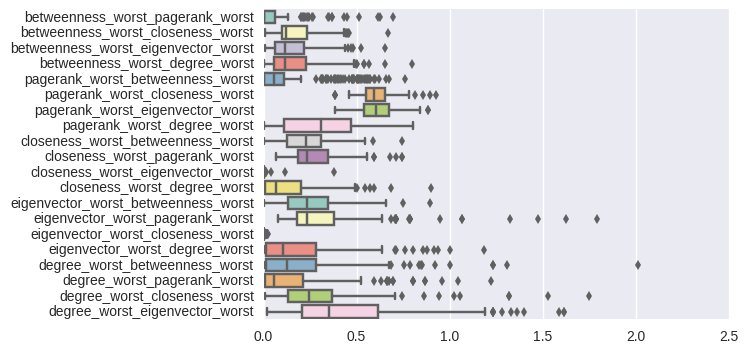

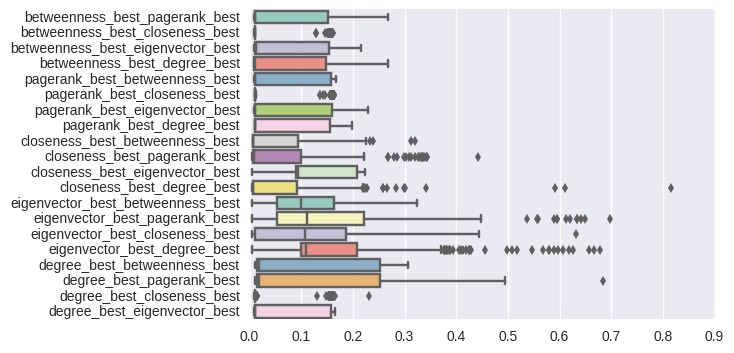

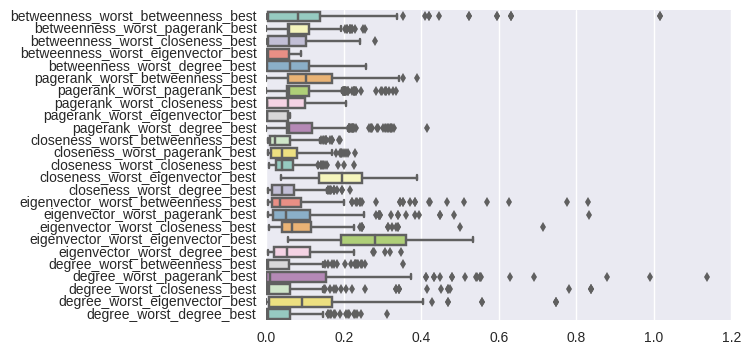

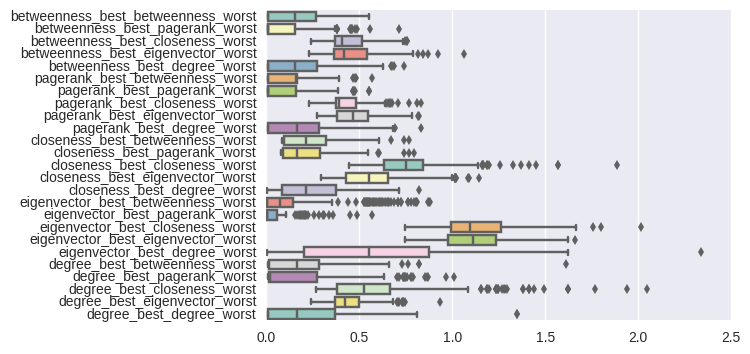

In [194]:
for df in d4.values():
    sb.boxplot(df, orient="h", palette="Set3") ,plt.show()
    df.describe()

# Epidemy Class 

The epidemy class is the core of this notebook. It extends the igraph graph class adding the methods required to premor an epidemy analysis smoothly

In [201]:
from igraph import *
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sb
import pandas as pd
from itertools import chain
import itertools
import pandas as pd
import hickle as hkl
import time
import os
%matplotlib inline 


class Epidemy(Graph):
    '''Epidemy extends the igraph's class Graph, adding some private fileds as patient_zero and sentinels.
    Moreover we have epidemic simulation functionality (SIR and NSIR)'''
    graph = None
    patient_zero = None
    sentinels = None
    global I
    
    def __init__(self, graph_edge_list, patient_zero = None, sentinels = None):
        '''The compartment label is a byte that can take values 0, 1 and 2, indicating respectivly
        0 - Suscebtible node
        1 - Infected node'''
        
        self.graph = Graph.Read_Ncol(graph_edge_list, directed=False)
        self.patient_zero = patient_zero
        self.sentinels = sentinels
    
    def N_SIR(self, num_simulation = 100, **kwargs):
        seq = []
        for i in range(num_simulation):
            #print("Simulation number", i+1)
            #print(kwargs)
            self.SIR(**kwargs)
            print("Sentinel", self.sentinels, "P0", self.patient_zero, "OUT", i)
            seq = seq + [np.nan if pd.isnull(v["iteration"]) else float(v["iteration"])
                         for v in self.graph.vs[set(self.sentinels)]]
            #print(len(seq))
        return seq
            
        
    #Epidemic Models
    def SIR(self, beta = 0.5, mu = 0.1,
            patient_zero = None, num_pat = 5,
            sentinels = None, num_sen = 5,
            friend_paradox = False, verbose= False):
        """Simulate an epidemy outbreaks using a sir model"""
        
        #SENTINELS MANAGEMENT
        if sentinels is not None:
            print("No_paradox")
            self.sentinels = set(sentinels)
        elif (self.sentinels is None) & (sentinels is None) :
            self.sentinels = set(np.random.choice(self.graph.vs.indices, size=num_sen, replace=False))
            print("No sentinels detected. Random selection: ", self.sentinels)
        if friend_paradox:
            print("Paradox")
            neighbors = np.unique(list(chain.from_iterable([self.graph.neighbors(v) for v in self.sentinels])))
            self.sentinels = set(np.random.choice(neighbors, size =len(self.sentinels), replace=False))
        
        #PATIENT ZERO MANAGEMENT
        if patient_zero is not None:
            I = set(patient_zero)
            self.patient_zero = set(patient_zero)
        elif self.patient_zero is not None:
            I = set(self.patient_zero)
        else:
            I = set(np.random.choice(self.graph.vs.indices, size= 5,replace =False))
            print("No patient zero detected. Random selection: ", I)
    
        
        #RESET NODES COMPARTMENT
        self.graph.vs["compartment"] = np.zeros(len(self.graph.vs), dtype = np.uint8)
        #RESET SENTINELS
        self.graph.vs["iteration"] = np.nan
        
        print ("Sentinel", self.sentinels, "P0", I, "IN")
               
        development = []
        
        start = time.time()
        for iteration in itertools.count():
            if(len(I)==0):
                break
            
            dI = set([j for j in list(itertools.chain.from_iterable(self.graph.neighborhood(I)))
                      if self.graph.vs[j]["compartment"] == 0 and np.random.random() < beta])
            self.graph.vs[dI]["compartment"] = 1 


            # Finds new removed nodes and update the status
            dR = set([k for k in I if np.random.random() < mu])
            self.graph.vs[dR]["compartment"] = 2
            
            self.graph.vs[dI & self.sentinels]["iteration"] = time.time()-start
            

            I = (I | dI) - (dR)
            
            development +=  [len(I)]
        return development